In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Dropping irrelevant features not being used to build the model


In [5]:
df = df.drop(["area_type", "society", "balcony", "availability"], axis=1)
df.shape


(13320, 5)

Checking for null values


In [6]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Since we have sufficient data we can drop null values


In [7]:
df = df.dropna()
df.isnull().sum()
# no null values left
# replace by imputation later

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df["size"].value_counts()
# represents the number of bedrooms in the house
# this feature needs to be changed for any work to be done on it

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [9]:
df["bath"].value_counts()
# represents the number of bathrooms in the house


2.0     6908
3.0     3285
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [10]:
df["location"].unique()
# represents the location of the house


array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [11]:
df["location"].value_counts()
# 1304 Unique locations present so we need to reduce it before we can do categorical encoding on it

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

<h3>Feature engineering</h3>
Replacing size feature by bhk to allow the model to work with numerical data


In [12]:
df["bhk"] = df["size"].apply(lambda x: int(x.split(" ")[0]))
df=df.drop("size", axis=1)
df["bhk"].value_counts()


2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bhk, dtype: int64

In [13]:
df["total_sqft"].dtype
# string data with some ranges, need to convert into a float value


dtype('O')

In [14]:
def is_float(x):
    """
    function to check for float values
    """
    try:
        float(x)
    except:
        return False
    return True


In [15]:
df[~df["total_sqft"].apply(is_float)].shape
# 190 rows of data having ranges instead of a single float value


(190, 5)

In [16]:
# example of the above
df[~df["total_sqft"].apply(is_float)].head(10)


,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [17]:
def convert_range_to_float(x):
    """
    function to convert range of total_sqft to a single float value,
    assuming the size to be average of the upper and lower bound
    """
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    # taking average value
    try:
        return float(x)
    except:
        return None


Add function to convert units of total_sqft

In [18]:
df2 = df.copy()
df2.total_sqft = df2.total_sqft.apply(convert_range_to_float)
# 46 cases have not been covered by the above function
df2 = df2[df2.total_sqft.notnull()]

Adding price per square feet feature


In [19]:
df2["price_per_sqft"] = df2["price"] * 100000 / df2["total_sqft"]
# prices are given in lakhs of rupees, converting them for easier interpretation 
# in price_per_sqft
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


<h3>Dimensionality Reduction</h3>


In [20]:
df2.location = df2.location.apply(lambda x: x.strip())
locations = df2["location"].value_counts(ascending=False)
locations
# the unique values of location are 1287, compared to 1304 found before because of incorrect 
# entries that had trailiing spaces

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [21]:
len(locations[locations > 10])

240

In [22]:
len(locations[locations <= 10])

1047

A major chunk of the locations have less than or equal to 10 instances so removing them would make our work much faster and simpler


In [23]:
locations_less_than_ten = locations[locations <= 10]
locations_less_than_ten

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [24]:
df2.location = df2.location.apply(
    lambda x: "other" if x in locations_less_than_ten else x
)
# setting the location value to other when it has less number of instances than 10

In [25]:
df2.columns

Index(['location', 'total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

<h3>Plotting graphs</h3>

Text(0, 0.5, 'price per sq ft')

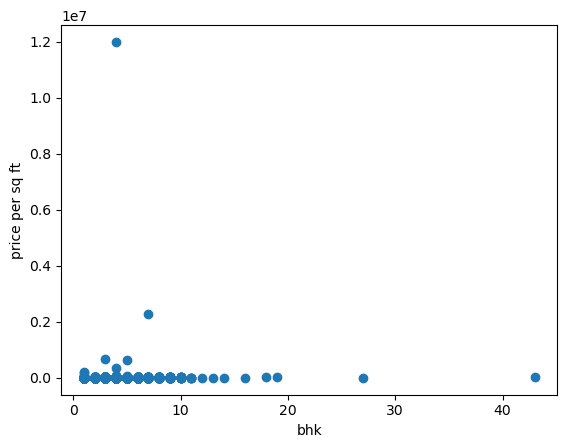

In [26]:
plt.scatter(df2.bhk, df2.price_per_sqft)
plt.xlabel("bhk")
plt.ylabel("price per sq ft")
# outliers present here too, removal will allow us to see patterns


In [27]:
num_cols=['bhk','total_sqft','price','price_per_sqft','bath']
categ_cols=['location']


Pairplot here

In [28]:
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


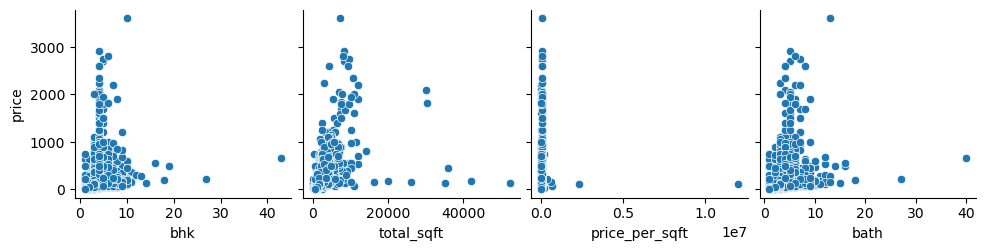

In [29]:
sns.pairplot(data=df2,x_vars=['bhk','total_sqft','price_per_sqft','bath'],y_vars=['price'])

Scatter plots 

<h3>Standardization</h3>


In [30]:
scaling_features = ["price", "price_per_sqft", "total_sqft"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
med = []
q95 = []
stddev = []
for i, col in enumerate(scaling_features):
    data = np.array(df2[col])
    med.append(np.median(data))
    q95.append(np.quantile(data, 0.95))
    stddev.append(np.std(data))
    print(f"median, q3 of {col} = {med}, {q95}".format(col, med[i], q95[i]))
    df2[col] = scaler.fit_transform(data.reshape(-1, 1))

median, q3 of price = [71.85], [320.0]
median, q3 of price_per_sqft = [71.85, 5438.331478242434], [320.0, 15312.121212121196]
median, q3 of total_sqft = [71.85, 5438.331478242434, 1275.0], [320.0, 15312.121212121196, 3216.549999999992]


<h3>Outlier removal</h3>


Visualizing the outliers


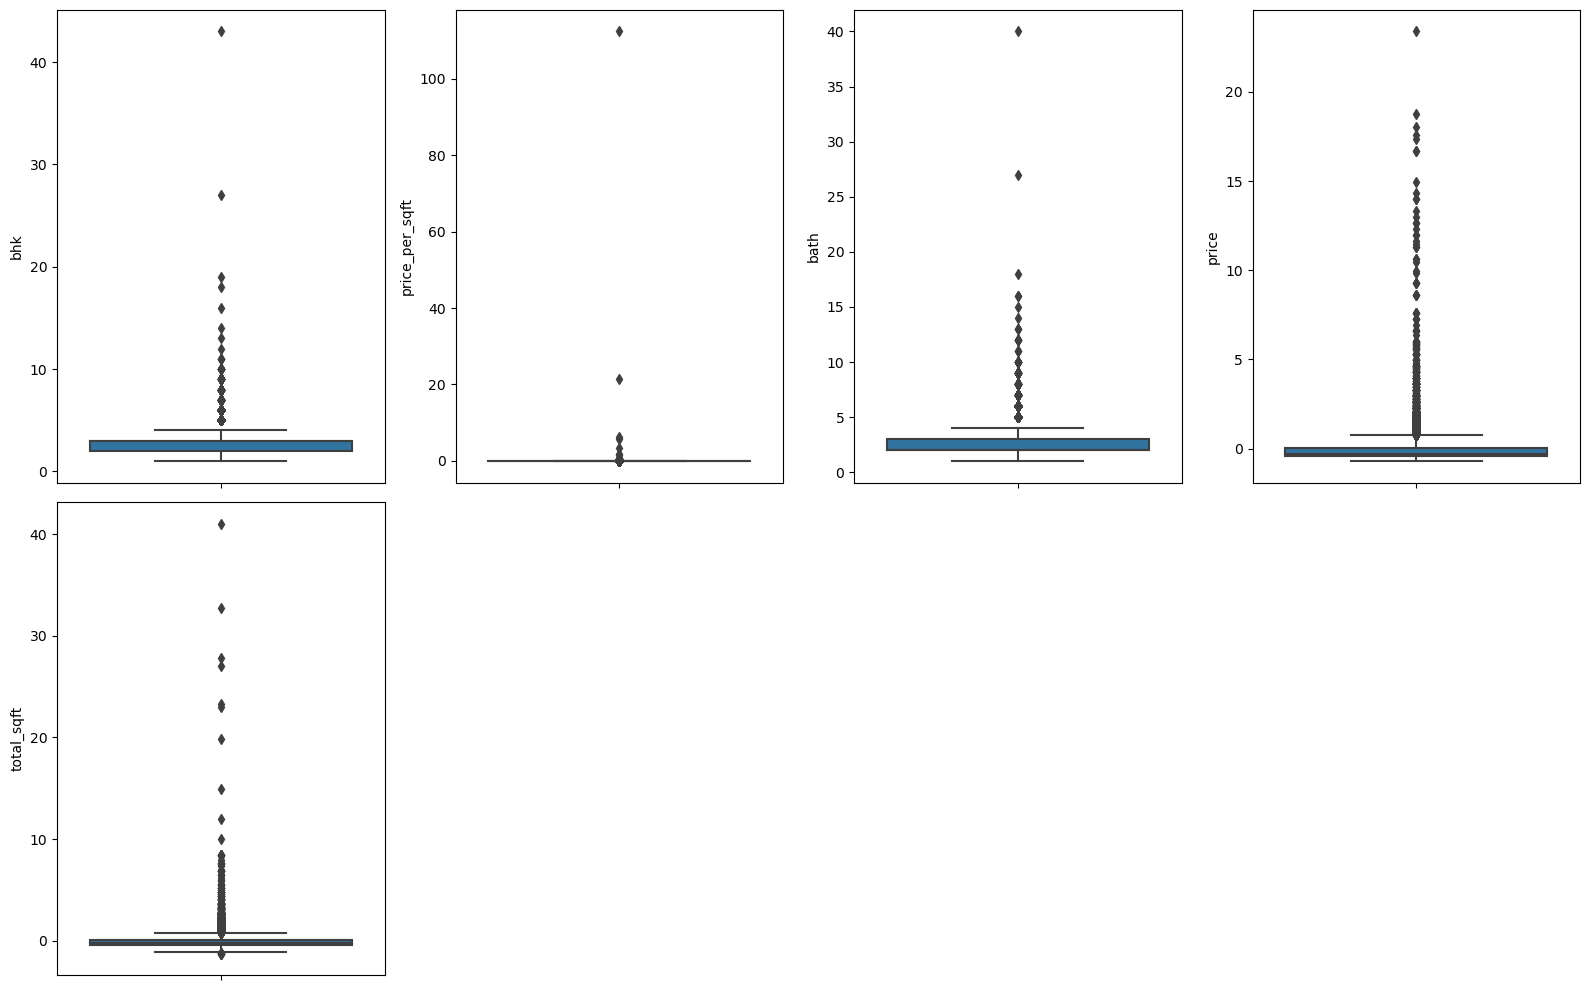

In [31]:
features = ["bhk", "price_per_sqft", "bath", "price", "total_sqft"]

plt.figure(figsize=(16, 10))

for i, col in enumerate(features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=col, data=df2)
    plt.ylabel(col)

plt.tight_layout()

Removal of outliers using quartile method


In [32]:
def remove_outliers(df2, features):
    for i, col in enumerate(features):
        Q1 = df2[col].quantile(0.25)
        Q3 = df2[col].quantile(0.75)
        IQR = Q3 - Q1
        df2 = df2[(df2[col] >= Q1 - 1.5 * IQR) & (df2[col] <= Q3 + 1.5 * IQR)]
    return df2


df3 = remove_outliers(df2, features)


Dataset after removal of outliers

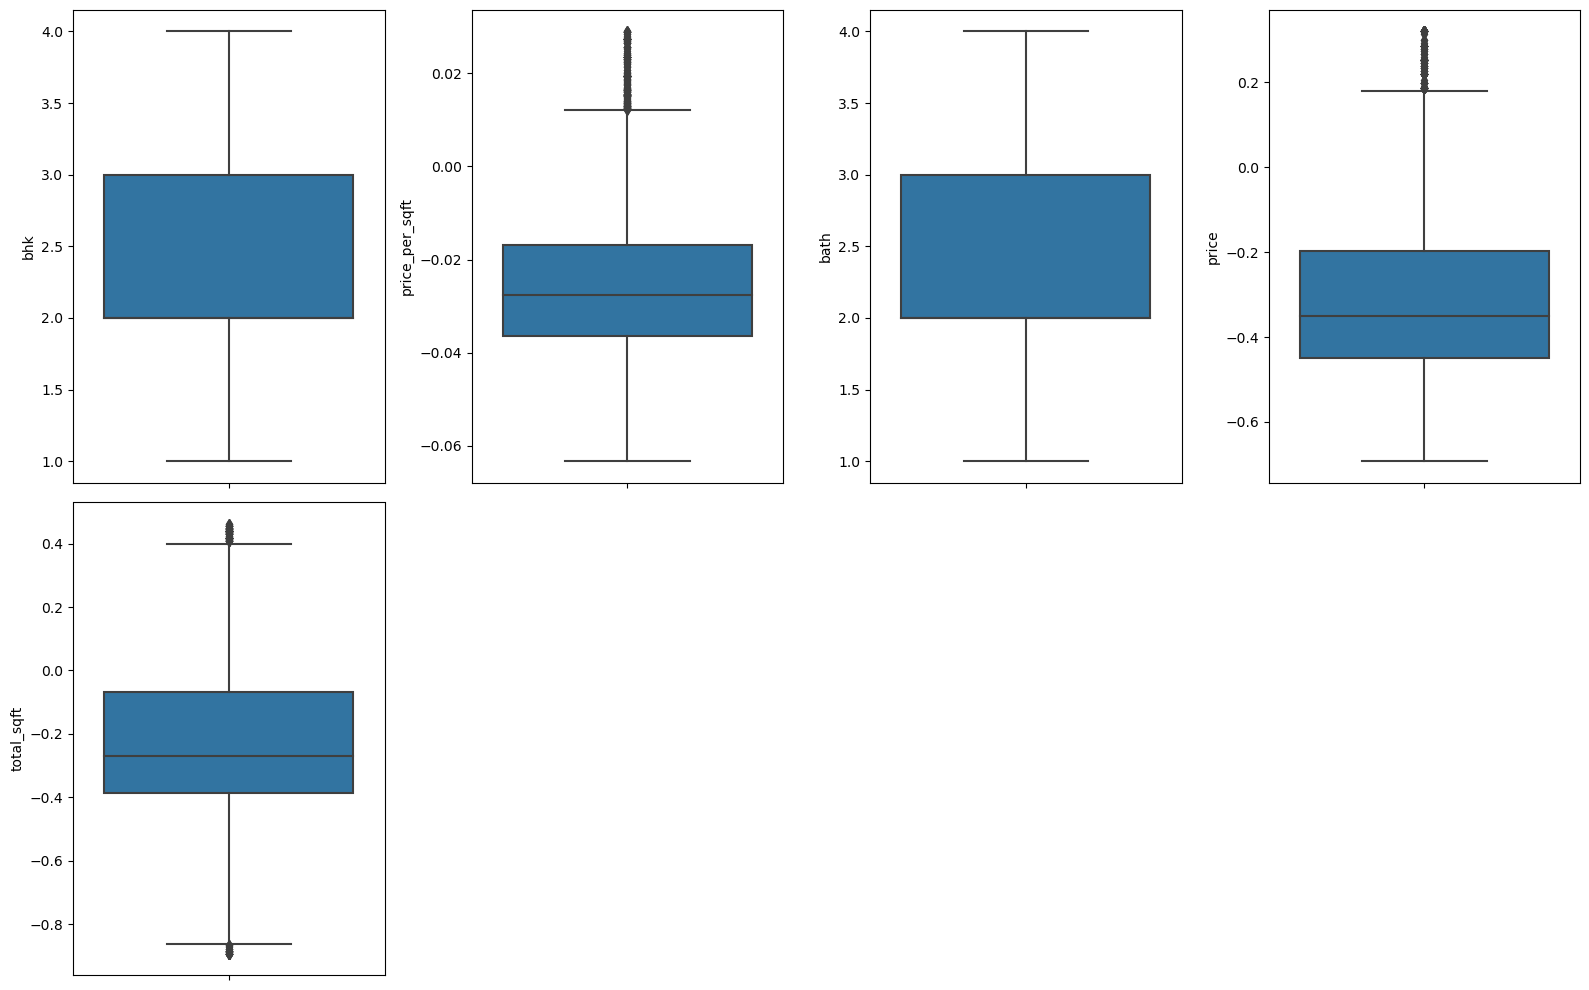

In [33]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=col, data=df3)
    plt.ylabel(col)

plt.tight_layout()

In [34]:
df3["bath"].unique()

array([2., 3., 1., 4.])

In [35]:
for i, col in enumerate(scaling_features):
    print("q95", col, len(df3[(df3[col] > q95[i] / stddev[i])]))
    print("med", col, len(df3[(df3[col] > med[i] / stddev[i])]))

q95 price 0
med price 0
q95 price_per_sqft 0
med price_per_sqft 0
q95 total_sqft 0
med total_sqft 0


In [36]:
print("q95 sqft", len(df3[(df3["total_sqft"] > 280 / stddev[2])]))
# bedrooms have an area of about 250 sq ft on average so we remove the values 
# which are above a certain threshold
print(df3.shape)
df3 = df3.drop(df3[(df3["total_sqft"] > 280 / stddev[2])].index)
print(df3.shape)

q95 sqft 531
(10055, 6)
(9524, 6)


In [37]:
# def remove_price_per_sqft_outliers(df):
#     df_out=pd.DataFrame()
#     for key, subdf in df.groupby('location'):
#         m = np.mean(subdf.price_per_sqft)
#         st = np.std(subdf.price_per_sqft)
#         reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
#         df_out = pd.concat([df_out,reduced_df],ignore_index=True)
#     return df_out

# df3=remove_price_per_sqft_outliers(df3)
# df3.shape

C:\Users\Pranshu\AppData\Local\Temp\ipykernel_14492\59893170.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr(), annot=True)


<AxesSubplot:>

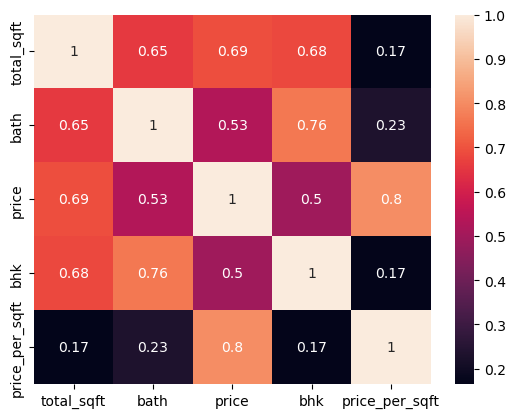

In [38]:
sns.heatmap(df3.corr(), annot=True)
# how do you take the corr of one var only

In [39]:
df3.columns

Index(['location', 'total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

<h3>Categorical encoding</h3>


In [40]:
# from sklearn.preprocessing import OneHotEncoder

# ohe=OneHotEncoder(handle_unknown='ignore',sparse=False)
# oh_df = pd.DataFrame(ohe.fit_transform(df3.location.values.reshape(-1,1)))
# oh_df.index=df3.index

# df4=df3.drop(['location'],axis=1)
# oh_df=pd.concat([oh_df,df4],axis=1)
# oh_df.head()

In [41]:
dummies = pd.get_dummies(df3.location)
df3 = pd.concat([df3, dummies.drop('other',axis='columns')],axis='columns')
df3 = df3.drop(["location"], axis=1)
df3.head()


,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,-0.403550,2.0,-0.490756,2,-0.039550,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.093191,2.0,-0.337039,3,-0.033875,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.027724,3.0,-0.115815,3,-0.015694,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.287165,2.0,-0.410780,2,-0.034395,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-0.311412,2.0,-0.497929,2,-0.043785,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


<Figure size 800x300 with 0 Axes>

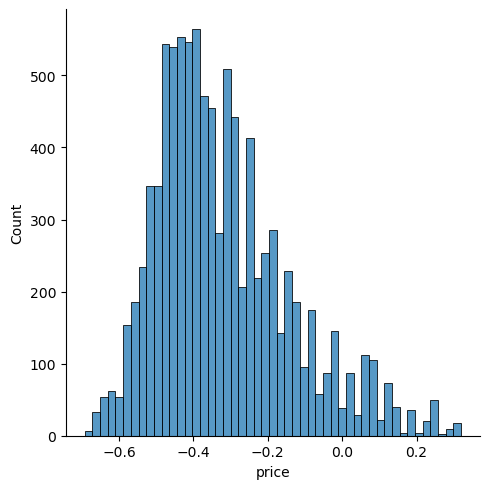

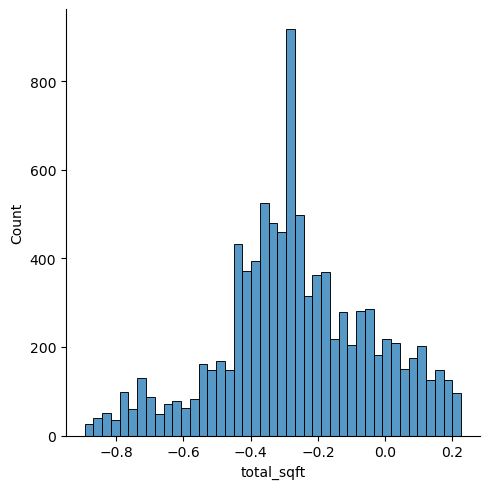

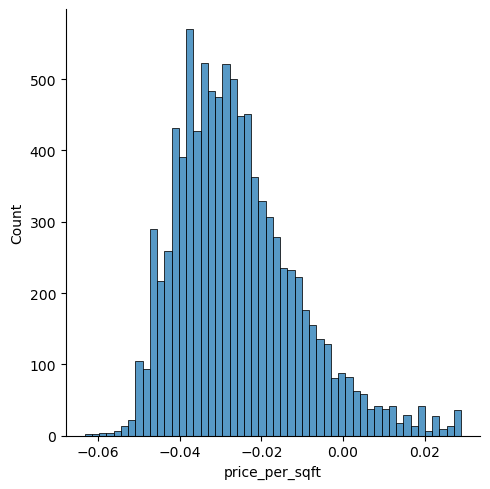

In [42]:
plt.figure(figsize=(8, 3))

sns.displot(df3.price)
sns.displot(df3.total_sqft)
sns.displot(df3.price_per_sqft)


<AxesSubplot:xlabel='price', ylabel='Density'>

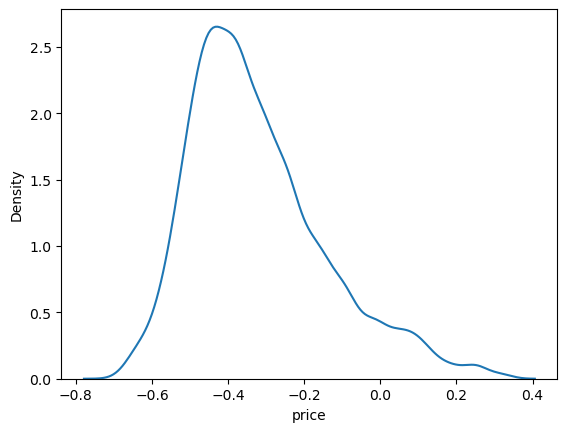

In [43]:
sns.kdeplot(df3.price)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

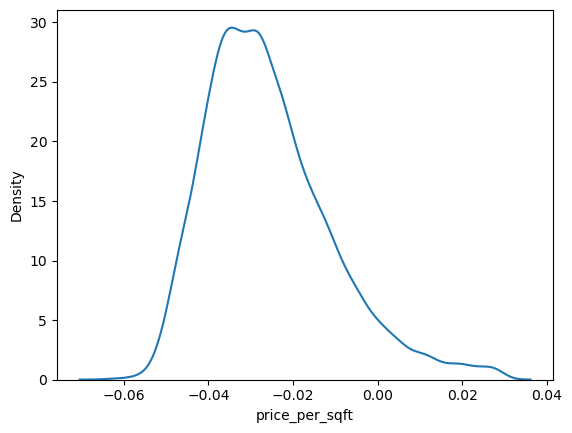

In [44]:
sns.kdeplot(df3.price_per_sqft)

<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

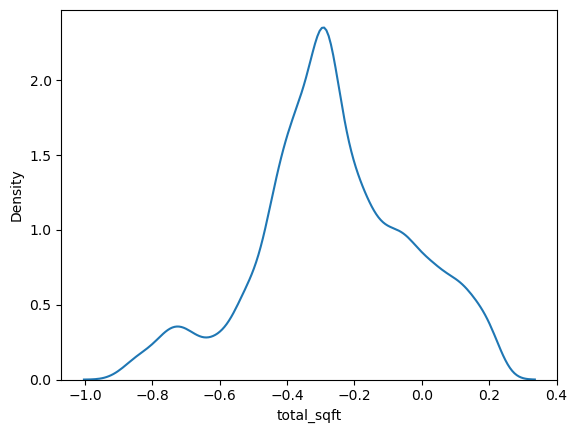

In [45]:
sns.kdeplot(df3.total_sqft)

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.pipeline import Pipeline


In [47]:
df3.columns

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '5th Block Hbr Layout',
       '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [58]:
X = df3[['total_sqft']]
y = df3["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [73]:
rf = RandomForestRegressor(n_estimators=100)
linear = LinearRegression()
lasso = Lasso()
score = []


In [74]:
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)
print("mse linear", mean_squared_error(y_test, linear_pred))


mse linear 0.017134799079171197


In [75]:
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("mse lasso", mean_squared_error(y_test, lasso_pred))


mse lasso 0.032777961851907775


In [76]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("mse random forest", mean_squared_error(y_test, rf_pred))


mse random forest 0.016703936862397576


In [77]:
accuracy = 100 - mean_squared_error(y_test, rf_pred) / y_test.var() * 100
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 49.05%


In [78]:
df3.shape

(9524, 243)

In [79]:
# from sklearn.model_selection import learning_curve

# train_sizes, train_scores_linear, cv_scores_linear = learning_curve(
#     linear, X, y, train_sizes=0.7, cv=5, scoring='neg_mean_squared_error')

# train_sizes, train_scores_lasso, cv_scores_lasso = learning_curve(
#     lasso, X, y, train_sizes=0.7, cv=5, scoring='neg_mean_squared_error')

# train_sizes, train_scores_rf, cv_scores_rf = learning_curve(
#     rf, X, y, train_sizes=0.7, cv=5, scoring='neg_mean_squared_error')

In [80]:
# pipe=Pipeline([('scaler', StandardScaler()),
#     ('rf', RandomForestRegressor(random_state=42)),
#     ('lr', LinearRegression()),
#     ('lasso', Lasso())]
# )
# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)

# print('Mean squared error:', mean_squared_error(y_test, y_pred))

In [81]:
# sss=StratifiedShuffleSplit(n_splits=4,test_size=0.3,random_state=0)
# sss.get_n_splits(X,y)
# for train_index, test_index in sss.split(X, y):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     linear.fit(X_train, y_train)
#     pred = linear.predict(X_test)
#     score.append(mean_absolute_error(y_test, pred))